In [2]:
# import libraries for a random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [3]:
# read in the data
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# check for null values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# put no cabin values into the cabin column that has a nan value
df['Cabin'] = df['Cabin'].fillna('No Cabin')
# fill the age column with the mean age
df['Age'] = df['Age'].fillna(df['Age'].mean())
# drop the rows with null values in the embarked column
df = df.dropna(subset=['Embarked'])


In [6]:
# do a label encoder for all categorical columns using a for loop
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df

/var/folders/v3/49wrpzwx4lddxywn9hk037k00000gn/T/ipykernel_2921/4134649762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/v3/49wrpzwx4lddxywn9hk037k00000gn/T/ipykernel_2921/4134649762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/var/folders/v3/49wrpzwx4lddxywn9hk037k00000gn/T/ipykernel_2921/4134649762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,522,7.2500,145,2
1,2,1,1,190,0,38.000000,1,0,595,71.2833,80,0
2,3,1,3,353,0,26.000000,0,0,668,7.9250,145,2
3,4,1,1,272,0,35.000000,1,0,48,53.1000,54,2
4,5,0,3,15,1,35.000000,0,0,471,8.0500,145,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,547,1,27.000000,0,0,100,13.0000,145,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,29,2
888,889,0,3,412,0,29.699118,1,2,674,23.4500,145,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,59,0


In [7]:
# do a train test split
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.7640449438202247

[Text(0.36257408405172414, 0.975, 'Sex <= 0.5\ngini = 0.47\nsamples = 711\nvalue = [442, 269]\nclass = Died'),
 Text(0.16882183908045978, 0.925, 'Pclass <= 2.5\ngini = 0.388\nsamples = 254\nvalue = [67, 187]\nclass = Survived'),
 Text(0.05747126436781609, 0.875, 'Name <= 877.0\ngini = 0.108\nsamples = 140\nvalue = [8, 132]\nclass = Survived'),
 Text(0.04597701149425287, 0.825, 'Name <= 26.5\ngini = 0.096\nsamples = 139\nvalue = [7, 132]\nclass = Survived'),
 Text(0.022988505747126436, 0.775, 'Parch <= 1.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = Died'),
 Text(0.011494252873563218, 0.725, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Survived'),
 Text(0.034482758620689655, 0.725, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Died'),
 Text(0.06896551724137931, 0.775, 'Fare <= 29.356\ngini = 0.071\nsamples = 135\nvalue = [5, 130]\nclass = Survived'),
 Text(0.05747126436781609, 0.725, 'Ticket <= 53.0\ngini = 0.155\nsamples = 59\nvalue = [5, 54]\nclass = Survived'),
 Text(0

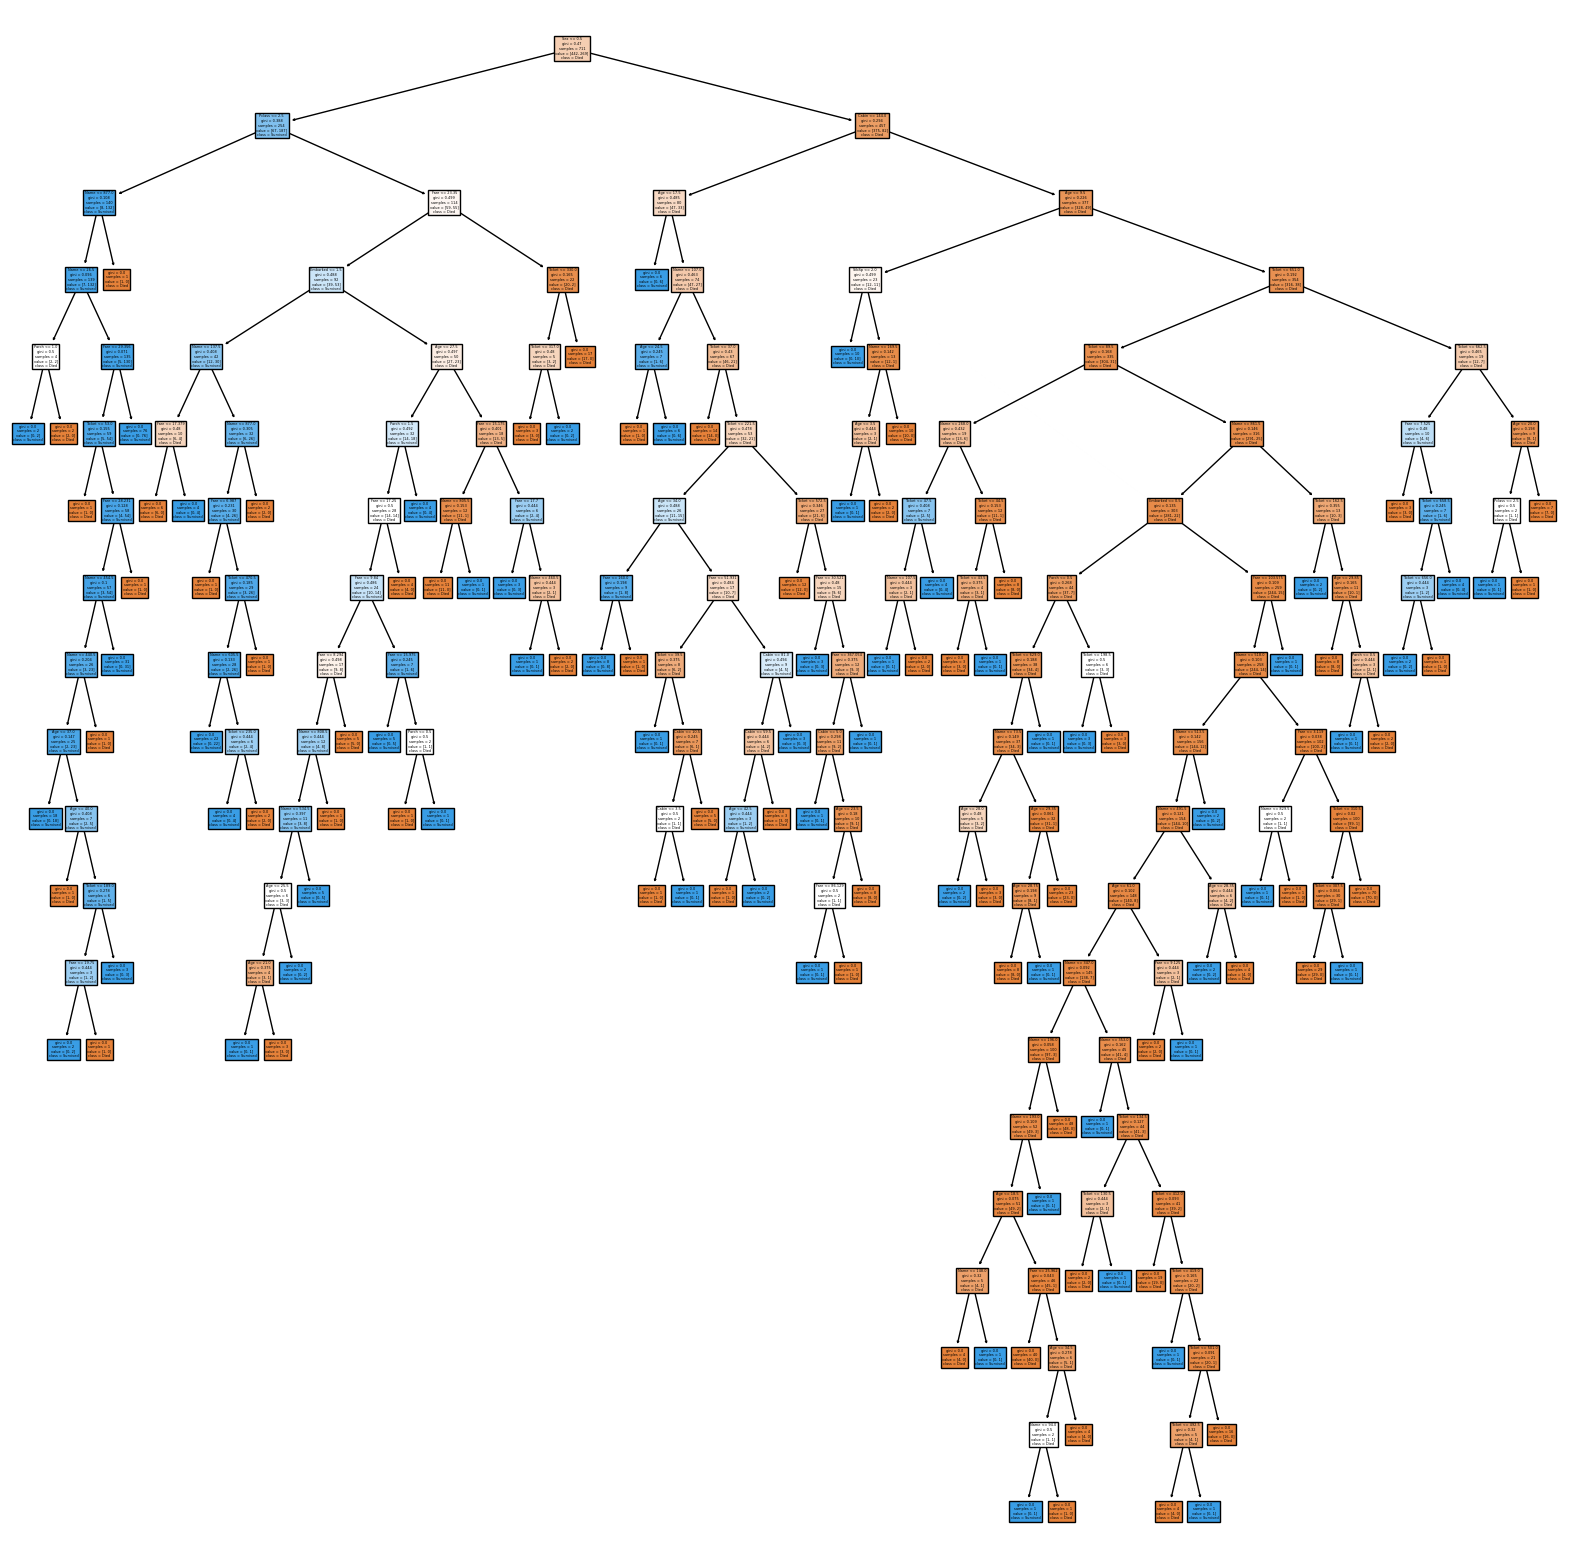

In [9]:
# plot the decision tree
from sklearn import tree
plt.figure(figsize=(20, 20))
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Died', 'Survived'])

In [10]:
# we can change the parameters to get a better accuracy score
dt = DecisionTreeClassifier(max_depth=30, min_samples_leaf=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)
# => a better accuracy score
# what is max_depth and min_samples_leaf?
# max_depth: Maximum tree depth is a limit to stop further splitting of nodes when the specified tree depth has been reached during the building of the initial decision tree.
# min_samples_leaf: the minimum number of samples required to be at a leaf node
# we can change the values to get a better accuracy score
# why when the min_samples_leaf is higher the accuracy score is higher too?
# because the higher the min_samples_leaf the less the tree will overfit the data

0.797752808988764

In [11]:
# now let's do a random forest model
rf = RandomForestClassifier(10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)


0.797752808988764

75

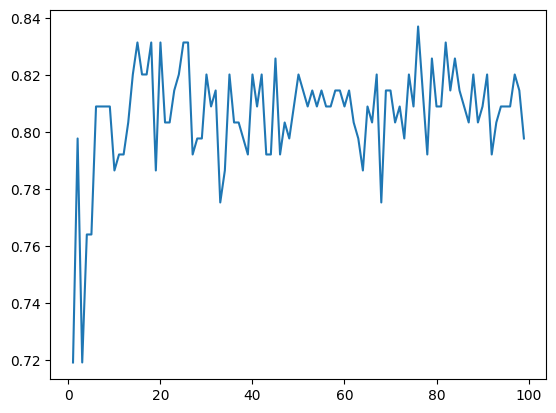

In [12]:
# do a for loop to see what is the best number of estimators and lineplot it
scores = []
for i in range(1, 100):
    rf = RandomForestClassifier(i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(range(1, 100), scores)
# get the best number of estimators
scores.index(max(scores))

In [17]:
# now let's do a random forest model
rf = RandomForestClassifier(75)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8033707865168539